In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
X = [[6],[8], [10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]

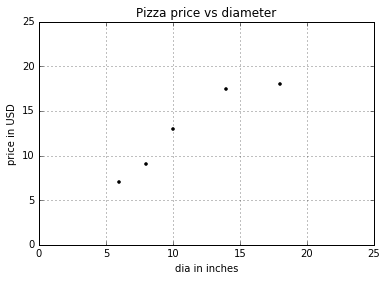

In [9]:
plt.figure()
plt.title("Pizza price vs diameter")
plt.xlabel("dia in inches")
plt.ylabel("price in USD")
plt.plot(X, y, 'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print 'A 12" pizza would cost $%.2f' % model.predict([12])[0]

A 12" pizza would cost $13.68


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [19]:
model.predict([[8],[12],[15],[20]])

array([[  9.77586207],
       [ 13.68103448],
       [ 16.60991379],
       [ 21.49137931]])

In [20]:
#RSS calculation
import numpy as np


In [22]:
print 'Residual Sum of Squares: %.2f ' % np.mean((model.predict(X) - y) ** 2)

Residual Sum of Squares: 1.75 


In [23]:
model.predict(X)

array([[  7.82327586],
       [  9.77586207],
       [ 11.72844828],
       [ 15.63362069],
       [ 19.5387931 ]])

In [24]:
y

[[7], [9], [13], [17.5], [18]]

In [28]:
np.mean((model.predict(X) - y) **2)

1.7495689655172406

In [34]:
#variance

from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print variance

# OR
print np.var(X, ddof=1)

23.2
23.2


In [32]:
X

[[6], [8], [10], [14], [18]]

In [35]:
#covariance
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 - xbar) * (13 - ybar) + (14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) / 4
print cov

print np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]

22.65
22.65


In [37]:
print np.cov(X,y)[0][1]

nan


In [39]:
y

[[7], [9], [13], [17.5], [18]]

In [41]:
# R-square:-
# In the case of 
#simple linear regression, r-squared is equal to the square of the Pearson product 
#moment correlation coefficient, or Pearson's r. 

In [42]:
#  The score method of LinearRegression returns the model's 
# r-squared value, as seen in the following example:


In [43]:
from sklearn.linear_model import LinearRegression
X = [[6], [8], [10], [14],   [18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8],  [9],   [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
print 'R-squared: %.4f' % model.score(X_test, y_test)

R-squared: 0.6620


In [47]:
model.score(X,y)

0.91000159642401024

In [48]:
# We can solve β  using NumPy, as follows:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
# β = (Xt . X) -1 . Xt . y
print dot(inv(dot(transpose(X), X)), dot(transpose(X), y))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [49]:
# NumPy also provides a least squares function that can solve the values of the  parameters more compactly:
from numpy.linalg import lstsq
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7],    [9],    [13],    [17.5],  [18]]
print lstsq(X, y)[0]

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [50]:
# Let's update our pizza-price predictor program to use the second explanatory 
#variable, and compare its performance on the test set to that of the simple linear 
#regression model

In [51]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7],    [9],    [13],    [17.5],  [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11],   [8.5],  [15],    [18],    [11]]

In [55]:
predictions = model.predict(X_test)

In [56]:
predictions

array([[ 10.0625    ],
       [ 10.28125   ],
       [ 13.09375   ],
       [ 18.14583333],
       [ 13.3125    ]])

In [62]:
for i, predic in enumerate(predictions):
    print 'Predicted: %s , Target: %s' % (predic, y_test[i])

Predicted: [ 10.0625] , Target: [11]
Predicted: [ 10.28125] , Target: [8.5]
Predicted: [ 13.09375] , Target: [15]
Predicted: [ 18.14583333] , Target: [18]
Predicted: [ 13.3125] , Target: [11]


In [68]:
# R-square
print 'R-squared value: %.2f' % model.score(X_test, y_test)

R-squared value: 0.77


In [1]:
#Polynomial regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X_train = [[6], [8], [10], [14],   [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6],  [8],   [11], [16]]
y_test = [[8], [12], [15], [18]]

In [4]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

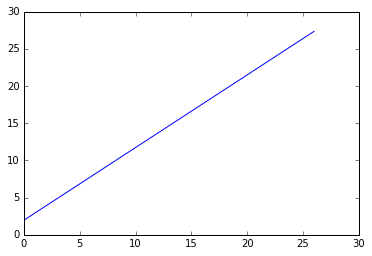

In [7]:
xx = np.linspace(0,26,100)
yy = reg.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

In [89]:
#xx.reshape(xx.shape[0],1)

In [92]:
xx.shape

(100,)

In [91]:
xx.reshape(xx.shape[0], 1).shape

(100, 1)

In [93]:
quadratic_featurizer = PolynomialFeatures(degree=2)

In [94]:
X_train_quad = quadratic_featurizer.fit_transform(X_train)
X_test_quad = quadratic_featurizer.fit_transform(X_test)

In [96]:
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quad, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
X_train_quad

array([[   1.,    6.,   36.],
       [   1.,    8.,   64.],
       [   1.,   10.,  100.],
       [   1.,   14.,  196.],
       [   1.,   18.,  324.]])

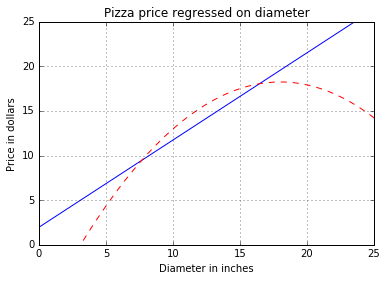

In [107]:
xx = np.linspace(0,26,100)
yy = reg.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)

In [104]:
print X_train
print X_train_quad
print X_test
print X_test_quad
print 'Simple linear regression r-squared', reg.score(X_test, y_test)

 [[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple linear regression r-squared 0.809726797708


In [106]:
print 'Quadratic regression r-squared', regressor_quadratic.score(X_test_quad, y_test)

 Quadratic regression r-squared 0.867544365635


degree=1 regression R-squared value= 0.809726797708


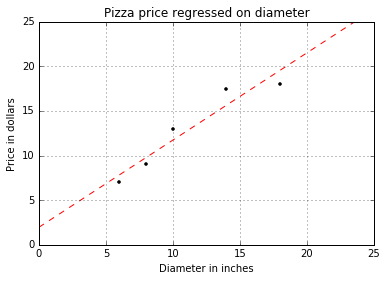

degree=2 regression R-squared value= 0.867544365635


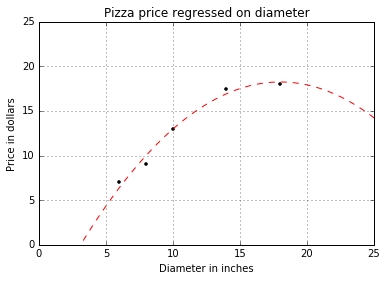

degree=3 regression R-squared value= 0.835692415604


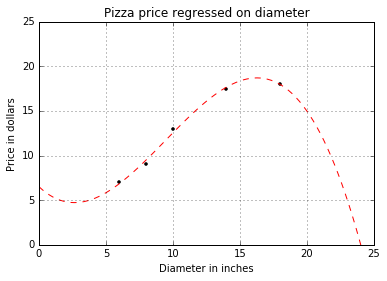

degree=4 regression R-squared value= 0.809588079581


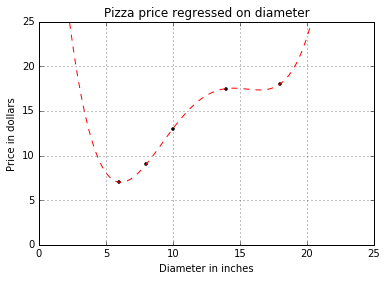

degree=5 regression R-squared value= 0.782128610968


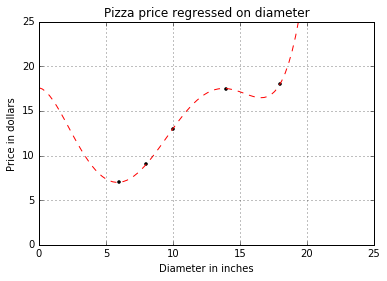

degree=6 regression R-squared value= 0.696007790924


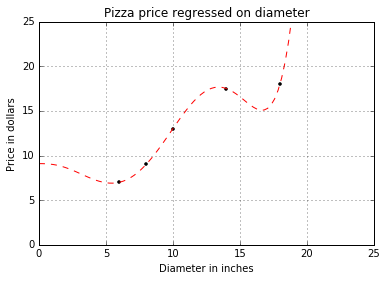

degree=7 regression R-squared value= 0.491984605687


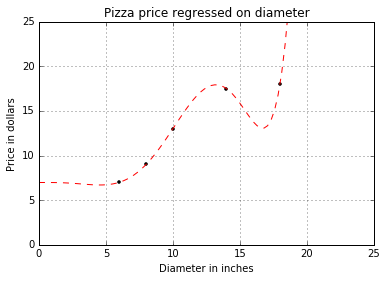

degree=8 regression R-squared value= 0.147957797273


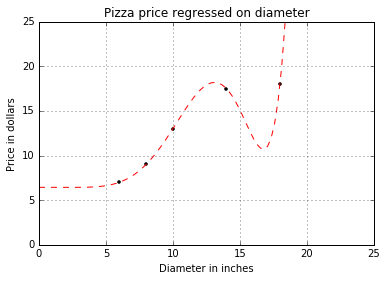

degree=9 regression R-squared value= -0.0943566670432


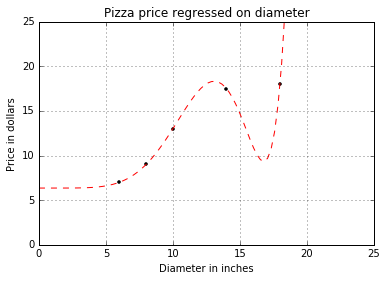

degree=10 regression R-squared value= 0.45891550106


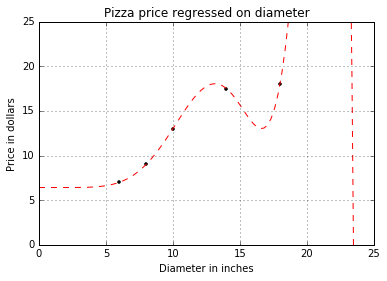

degree=11 regression R-squared value= -0.603510431196


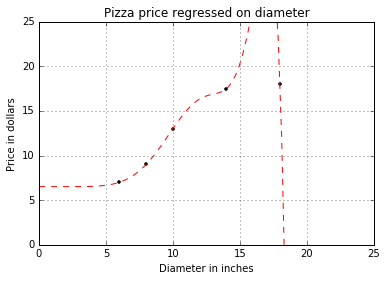

degree=12 regression R-squared value= -42.5220689043


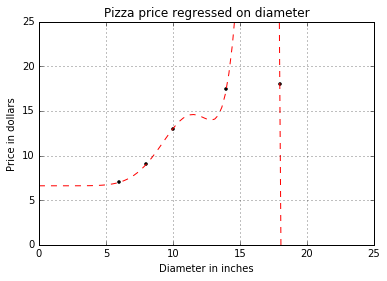

degree=13 regression R-squared value= -414.444921972


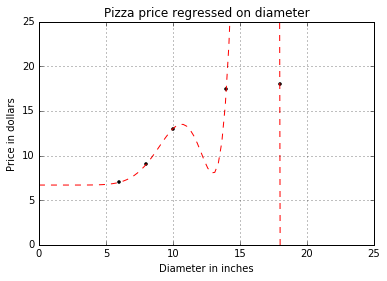

degree=14 regression R-squared value= -2801.16946626


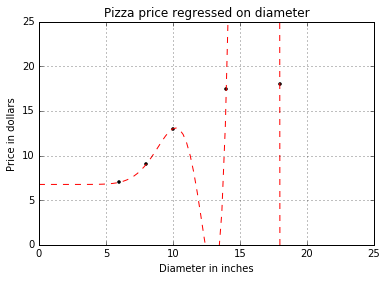

In [38]:
xx = np.linspace(0,26,100)
yy = reg.predict(xx.reshape(xx.shape[0], 1))

# chnge degree value and test for various values
# 9 onwards it starts going -ve
for i in xrange(1,15):
    cubic_featurizer = PolynomialFeatures(degree=i)
    X_train_cubic = cubic_featurizer.fit_transform(X_train)
    X_test_cubic = cubic_featurizer.fit_transform(X_test)

    cubic_regressor = LinearRegression()
    cubic_regressor.fit(X_train_cubic, y_train)
    
    print 'degree=%d regression R-squared value=' %i , cubic_regressor.score(X_test_cubic, y_test)
    
    #plot for this degree
    plt.plot(X_train, y, 'k.')
    
    xx_degree = cubic_featurizer.fit_transform(xx.reshape(xx.shape[0], 1))
    plt.plot(xx, cubic_regressor.predict(xx_degree), c='r', linestyle='--')
    plt.title('Pizza price regressed on diameter')
    plt.xlabel('Diameter in inches')
    plt.ylabel('Price in dollars')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    plt.show()


In [15]:
print 'Cubic regression r-squared', cubic_regressor.score(X_test_cubic, y_test)

Cubic regression r-squared 0.809726797708


In [36]:
[x for x in xrange(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
# Regularization --
# The LASSO produces sparse parameters; most of the coefficients will become zero, 
# and the model will depend on a small subset of the features. In contrast, ridge 
# regression produces models in which most parameters are small but nonzero.

In [40]:
#UCI wine data regression
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

#book refers this one: http://ieor.berkeley.edu/~ieor265/homeworks/winequality-red.csv

import pandas as pd

In [49]:
df = pd.read_csv("http://ieor.berkeley.edu/~ieor265/homeworks/winequality-red.csv", sep=';')

In [50]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [52]:
import matplotlib.pyplot as plt

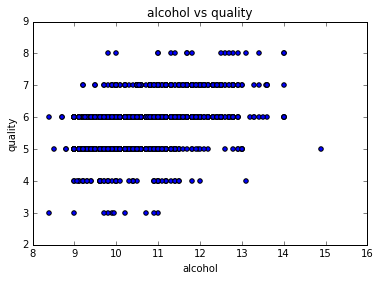

In [53]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('alcohol vs quality')
plt.show()

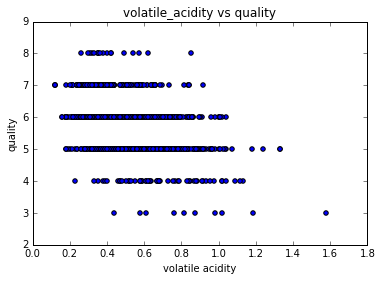

In [54]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.title('volatile_acidity vs quality')
plt.show()

In [55]:
# qualitly ~ .47 * alcohol
# quality ~ -.39 * volatile_acidity
# etc...
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [56]:
#modeling
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [58]:
list(df.columns)[:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [60]:
X = df[list(df.columns)[:-1]]
y = df['quality']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred = lin_reg.predict(X_test)

In [64]:
print "R squared value=%.2f" % lin_reg.score(X_test, y_test)

R squared value=0.33


In [65]:
# using cross validation
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression


In [67]:
reg_cv = LinearRegression()
cv_score = cross_val_score(reg_cv, X, y, cv=5)
print cv_score
print cv_score.mean()

[ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]
0.290041628842


In [73]:
print y_pred[:10]

[ 5.49782716  5.29592189  6.50599516  5.83833127  5.74033031  6.16640081
  5.12721285  5.34678787  5.49468753  5.7683676 ]


In [74]:
print y_test[:10]

1529    6
469     5
395     7
418     6
1423    4
972     7
273     5
65      5
645     7
917     6
Name: quality, dtype: int64


In [85]:
for pred,test in zip(y_pred[:10], y_test[:10]):
    print "Predicted:%.3f and Real:%d" %(pred,test)
    #print pred,test

Predicted:5.498 and Real:6
Predicted:5.296 and Real:5
Predicted:6.506 and Real:7
Predicted:5.838 and Real:6
Predicted:5.740 and Real:4
Predicted:6.166 and Real:7
Predicted:5.127 and Real:5
Predicted:5.347 and Real:5
Predicted:5.495 and Real:7
Predicted:5.768 and Real:6


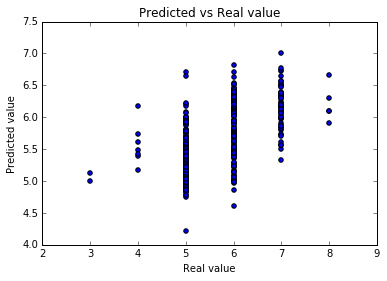

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Predicted vs Real value")
plt.show()

In [91]:
#Gradient Descent - BGD and SGD
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [94]:
data = load_boston()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [102]:
#data.data
#data.target

In [105]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.fit_transform(X_test)
y_test = y_scaler.fit_transform(y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [112]:
sgd_reg = SGDRegressor()
cv_scores = cross_val_score(sgd_reg, X_train, y_train, cv=5)
print "CV R-squared: ", cv_scores
print "Average CV R-squared : %.3f" % np.mean(cv_scores)

CV R-squared:  [ 0.54252246  0.71575131  0.66083874  0.80842996  0.66919671]
Average CV R-squared : 0.679


In [119]:
print sgd_reg.fit(X_train, y_train)
print "Test set R-squared: ", sgd_reg.score(X_test, y_test)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
Test set R-squared:  0.77042793474


In [ ]:
#--end--